In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
path="C:/Users/alexa/OneDrive/Desktop/Analysis of Flight Delay Trends in the Airline Industry/Main Sample.csv"
df=pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Flight number                   539382 non-null  int64 
 1   Time of the day  in minute      539382 non-null  int64 
 2   Duration of flight in minute    539382 non-null  int64 
 3   Airline                         539382 non-null  object
 4   AirportFrom                     539382 non-null  object
 5   AirportTo                       539382 non-null  object
 6   DayOfWeek (1-Monday, 7-Sunday)  539382 non-null  int64 
 7   Status (0-ontime, 1-delayed)    539382 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [4]:
df['Airline'].nunique()


18

In [5]:
df['AirportFrom'].nunique()

293

In [6]:
df.isnull().sum()

Flight number                     0
Time of the day  in minute        0
Duration of flight in minute      0
Airline                           0
AirportFrom                       0
AirportTo                         0
DayOfWeek (1-Monday, 7-Sunday)    0
Status (0-ontime, 1-delayed)      0
dtype: int64

In [7]:
totall_status =df.shape[0]
num_ontime=df[df['Status (0-ontime, 1-delayed)'] == 0].shape[0]
num_delayed=df[df['Status (0-ontime, 1-delayed)']==1].shape[0]

proportion_ontime= round(num_ontime / totall_status *100,2)
proportion_delayed= round(num_delayed / totall_status *100,2)
print(f' Total Flights = {totall_status} \n On time Flights = {num_ontime} \n Delayded Flights = {num_delayed}')

 Total Flights = 539382 
 On time Flights = 299118 
 Delayded Flights = 240264


In [8]:
proportion_ontime= num_ontime / totall_status *100
proportion_delayed= num_delayed / totall_status *100

In [9]:
ontime_flight=  round(totall_status * (proportion_ontime / 100))
delayed_flight=round (totall_status * (proportion_delayed/ 100))

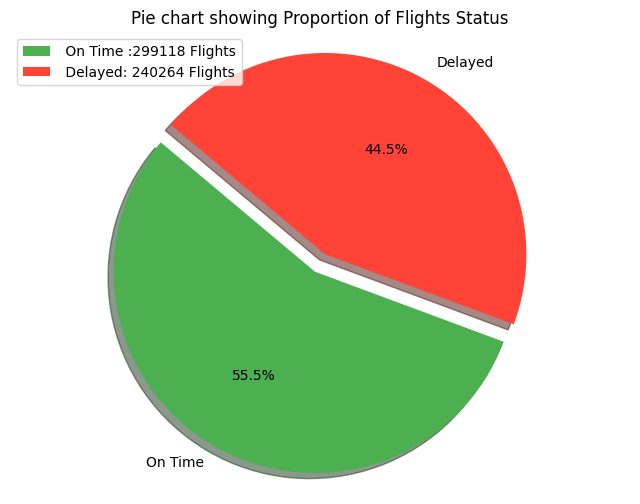

In [10]:
labels = ['On Time', 'Delayed']
sizes = [num_ontime, num_delayed]
colors = ['#4CAF50', '#FF4336']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend([f' On Time :{int(ontime_flight)} Flights' , f' Delayed: {int(delayed_flight)} Flights'])
plt.title('Pie chart showing Proportion of Flights Status')
plt.show()

 ## Flights can be categorized as Short-haul, Medium-haul, Long-haul, and Ultra-long-haul flight according to the flight duration. Based on the information presented in the dataset, which category of flight experienced the most delays?

In [11]:
def categorize_flight(duration):
    if duration < 180:
        return 'Short-haul'
    elif 180 <= duration < 360:
        return 'Medium-haul'
    elif 360 <= duration < 720:
        return 'Long-haul'
    else:
        return 'Ultra-long-haul'

In [12]:
df['Flight Category'] = df['Duration of flight in minute'].apply(categorize_flight)


delay_rates_by_category = df.groupby('Flight Category')['Status (0-ontime, 1-delayed)'].mean()
total_flights_by_category = df.groupby('Flight Category').size()
delayed_flights_by_category = df[df['Status (0-ontime, 1-delayed)'] == 1].groupby('Flight Category').size()

analysis_results = pd.DataFrame({
    'Total Flights': total_flights_by_category,
    'Delayed Flights': delayed_flights_by_category,
    'Delay Rate': delay_rates_by_category 
})

analysis_results

,Total Flights,Delayed Flights,Delay Rate
Flight Category,,,
Long-haul,6782,3090,0.455618
Medium-haul,93619,46756,0.499429
Short-haul,438981,190418,0.433773


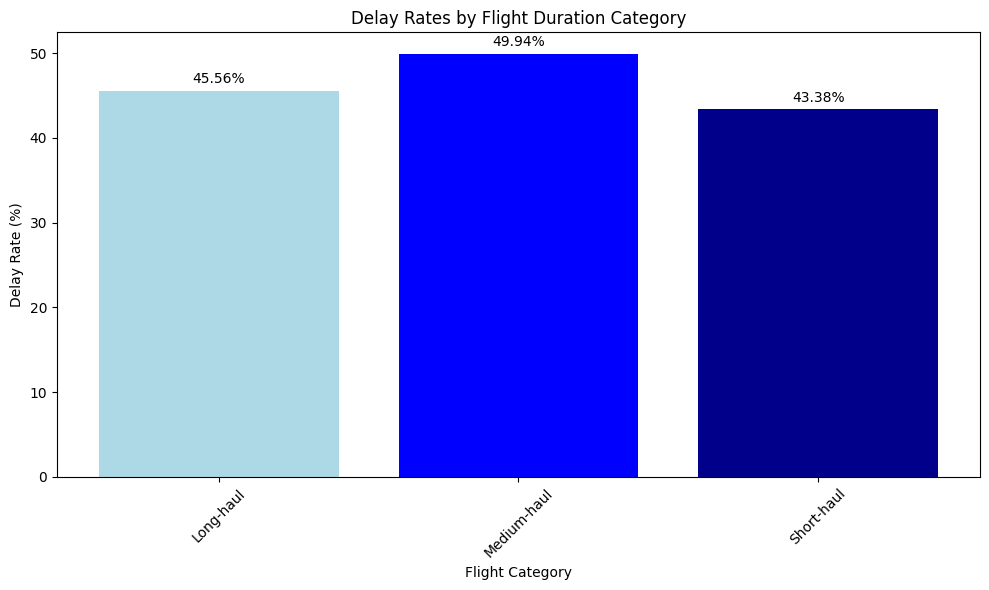

In [13]:
categories = analysis_results.index
delay_rates = analysis_results['Delay Rate'] * 100  

plt.figure(figsize=(10, 6))
plt.bar(categories, delay_rates, color=['lightblue', 'blue', 'darkblue', 'navy'])
plt.xlabel('Flight Category')
plt.ylabel('Delay Rate (%)')
plt.title('Delay Rates by Flight Duration Category')
plt.xticks(rotation=45)

# Annotate bars with the percentage values
for i, rate in enumerate(delay_rates):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

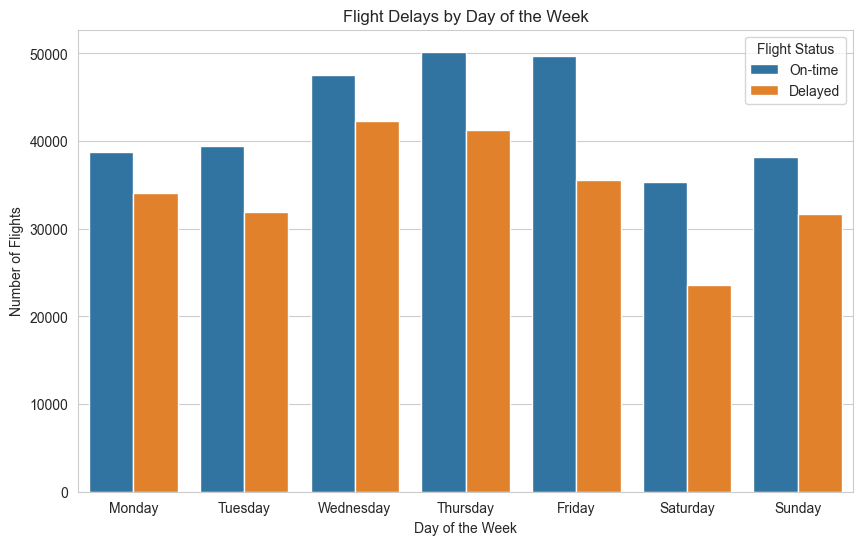

In [14]:
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['Day Name'] = df['DayOfWeek (1-Monday, 7-Sunday)'].map(day_names)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Day Name', hue='Status (0-ontime, 1-delayed)', data=df, order=day_order)
plt.title('Flight Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Status', labels=['On-time', 'Delayed'])
plt.show()

In [15]:
print(df.columns)

Index(['Flight number', 'Time of the day  in minute',
       'Duration of flight in minute', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek (1-Monday, 7-Sunday)', 'Status (0-ontime, 1-delayed)',
       'Flight Category', 'Day Name'],
      dtype='object')


C:\Users\alexa\AppData\Local\Temp\ipykernel_32292\2766100540.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_delays = df.groupby('Time of Day Category')['Status (0-ontime, 1-delayed)'].value_counts(normalize=True) * 100


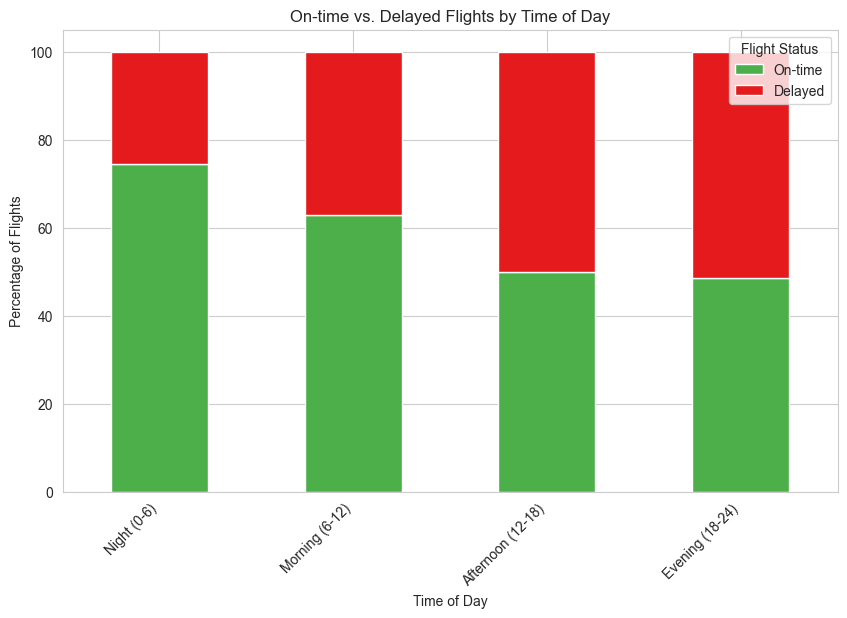

In [16]:
time_bins = [0, 360, 720, 1080, 1440] 

# Define labels for the bins
time_labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']

df['Time of Day Category'] = pd.cut(df['Time of the day  in minute'], bins=time_bins, labels=time_labels)


time_of_day_delays = df.groupby('Time of Day Category')['Status (0-ontime, 1-delayed)'].value_counts(normalize=True) * 100

# The 'unstack' operation will pivot the last level of the index labels,
# which will turn the unique values of 'Status (0-ontime, 1-delayed)' into columns,
# so you'll end up with one column for on-time and one column for delayed
time_of_day_delays = time_of_day_delays.unstack()



time_of_day_delays.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4daf4a', '#e41a1c'])
plt.title('On-time vs. Delayed Flights by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Flights')
plt.legend(['On-time', 'Delayed'], title='Flight Status')
plt.xticks(rotation=45, ha="right")
plt.show()

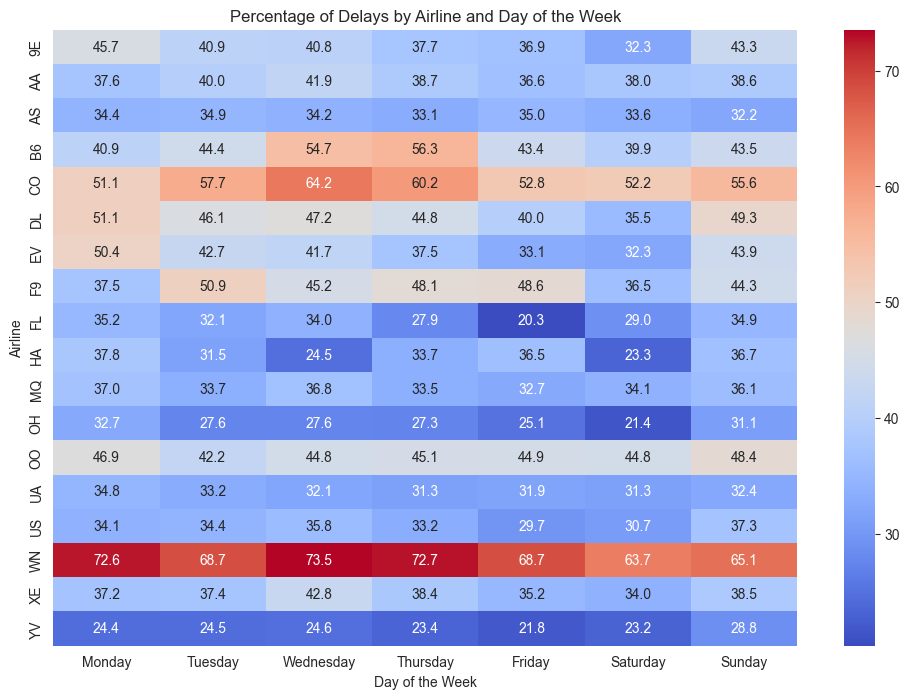

In [17]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


pivot_data = df.pivot_table(
    index='Airline', 
    columns='DayOfWeek (1-Monday, 7-Sunday)', 
    values='Status (0-ontime, 1-delayed)', 
    aggfunc='mean'
)*100

# Rename the columns according to the day_order for correct sequence
pivot_data.columns = day_order

ordered_pivot_data = pivot_data[day_order]

plt.figure(figsize=(12, 8))
sns.heatmap(ordered_pivot_data, annot=True, cmap='coolwarm', fmt=".1f",)
plt.title('Percentage of Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Airline')
plt.show()

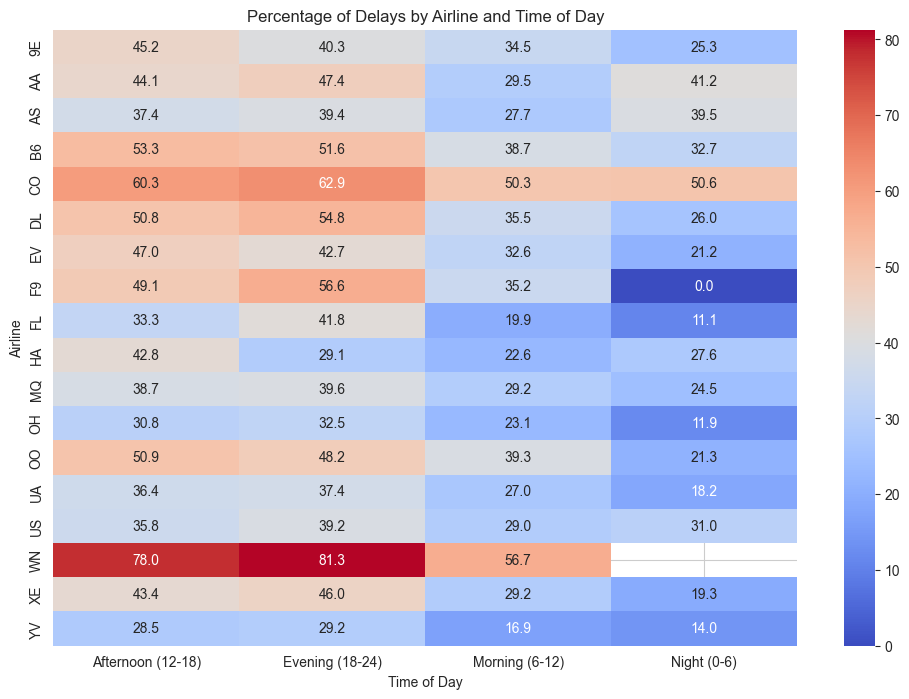

In [18]:
# Define a function to categorize the time of day
def categorize_time_of_day(x):
    if 0 <= x < 360:
        return 'Night (0-6)'
    elif 360 <= x < 720:
        return 'Morning (6-12)'
    elif 720<= x < 1080:
        return 'Afternoon (12-18)'
    elif 1080 <= x < 1440:
        return 'Evening (18-24)'

df['TimeOfDay'] = df['Time of the day  in minute'].apply(categorize_time_of_day)

pivot_data_time = df.pivot_table(
    index='Airline', 
    columns='TimeOfDay', 
    values='Status (0-ontime, 1-delayed)', 
    aggfunc='mean'
) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data_time, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Percentage of Delays by Airline and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Airline')
plt.show()


In [19]:
# Filter delayed flights for WN
delayed_flights = df[df['Status (0-ontime, 1-delayed)'] == 1]
wn_delayed_flights = delayed_flights[delayed_flights['Airline'] == 'WN']

wn_departure_delays = wn_delayed_flights['AirportFrom'].value_counts().head(5)
wn_arrival_delays = wn_delayed_flights['AirportTo'].value_counts().head(5)

wn_departure_delays, wn_arrival_delays


(AirportFrom
 LAS    4874
 MDW    4848
 PHX    3681
 BWI    3676
 DEN    3023
 Name: count, dtype: int64,
 AirportTo
 LAS    4555
 MDW    4103
 PHX    3794
 BWI    3044
 DEN    2887
 Name: count, dtype: int64)

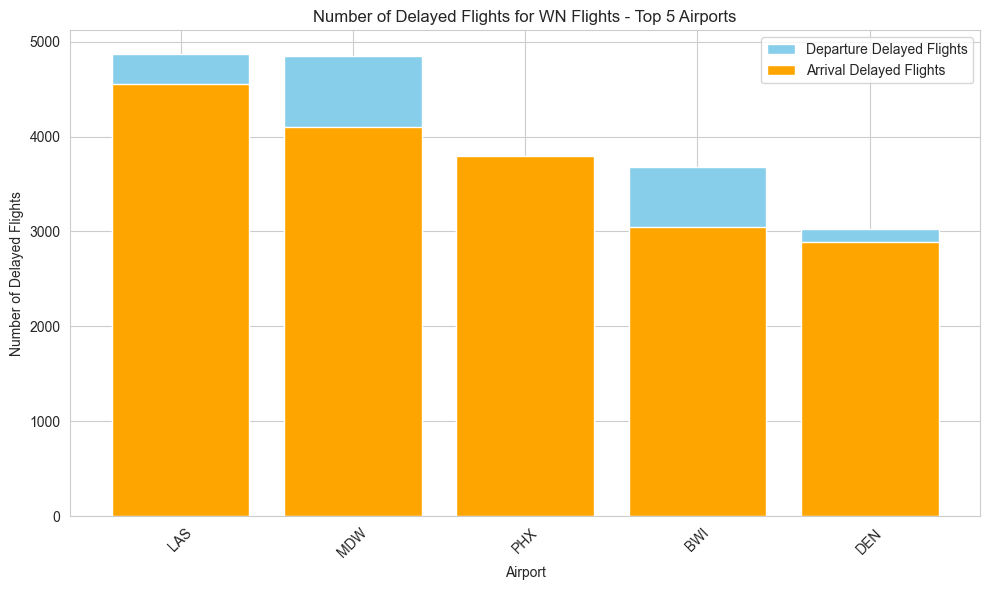

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(wn_departure_delays.index, wn_departure_delays, color='skyblue', label='Departure Delayed Flights')
plt.bar(wn_arrival_delays.index, wn_arrival_delays, color='orange', label='Arrival Delayed Flights')
plt.title('Number of Delayed Flights for WN Flights - Top 5 Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

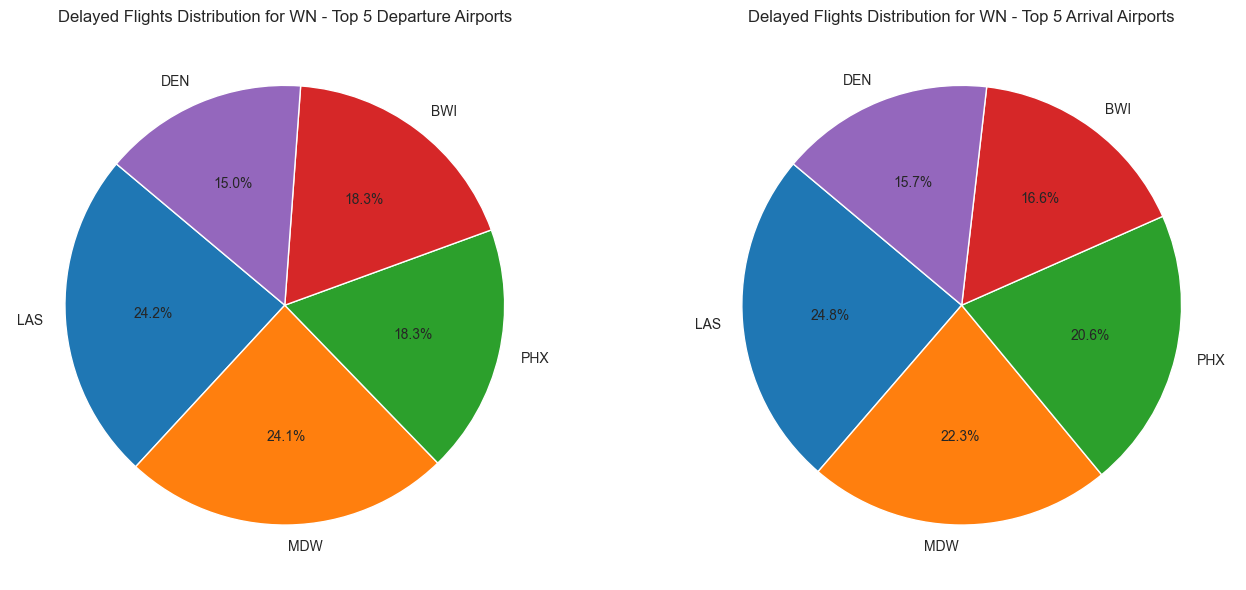

In [21]:
departure_airports = wn_departure_delays.index
departure_delay_counts = wn_departure_delays.values

arrival_airports = wn_arrival_delays.index
arrival_delay_counts = wn_arrival_delays.values

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(departure_delay_counts, labels=departure_airports, autopct='%1.1f%%', startangle=140)
plt.title('Delayed Flights Distribution for WN - Top 5 Departure Airports')


plt.subplot(1, 2, 2)
plt.pie(arrival_delay_counts, labels=arrival_airports, autopct='%1.1f%%', startangle=140)
plt.title('Delayed Flights Distribution for WN - Top 5 Arrival Airports')
plt.tight_layout()
plt.show()

In [22]:
delaned_by_Airlines= df[df['Status (0-ontime, 1-delayed)']== 1]['Airline'].value_counts().sort_values()
ontime_by_Airlines= df[df['Status (0-ontime, 1-delayed)']== 0]['Airline'].value_counts()

analysis_results = pd.DataFrame({
                                 'Delayded Airlines Flights': delaned_by_Airlines,
                                 'On time Airlines Flights': ontime_by_Airlines})

sorted_analysis_results = analysis_results.sort_values(by='Delayded Airlines Flights', ascending=False)
sorted_analysis_results


,Delayded Airlines Flights,On time Airlines Flights
Airline,,
WN,65657,28440
DL,27452,33488
OO,22760,27494
AA,17736,27920
MQ,12742,23862
CO,11957,9161
XE,11795,19331
US,11591,22909
EV,11255,16728


In [23]:
wn_flights = df[df['Airline'] == 'WN']

wn_airport_delays = wn_flights.groupby('AirportFrom').agg(
    Total_Flights=('Status (0-ontime, 1-delayed)', 'count'),
    Delayed_Flights=('Status (0-ontime, 1-delayed)', 'sum')
).reset_index()

wn_airport_delays['Delay_Rate'] = wn_airport_delays['Delayed_Flights'] / wn_airport_delays['Total_Flights']

wn_airport_delays_sorted = wn_airport_delays.sort_values(by='Delayed_Flights', ascending=False)

wn_airport_delays_sorted.head()


,AirportFrom,Total_Flights,Delayed_Flights,Delay_Rate
29,LAS,6360,4874,0.766352
37,MDW,6217,4848,0.779797
50,PHX,5098,3681,0.722048
11,BWI,4815,3676,0.763448
16,DEN,4167,3023,0.725462


In [24]:
wn_flights = df[df['Airline'] == 'WN']

# Group by departure airport and calculate total flights and delayed flights for WN
wn_airport_delays = wn_flights.groupby('AirportTo').agg(
    Total_Flights=('Status (0-ontime, 1-delayed)', 'count'),
    Delayed_Flights=('Status (0-ontime, 1-delayed)', 'sum')
).reset_index()

wn_airport_delays['Delay_Rate'] = wn_airport_delays['Delayed_Flights'] / wn_airport_delays['Total_Flights']

wn_airport_delays_sorted = wn_airport_delays.sort_values(by='Delayed_Flights', ascending=False)

wn_airport_delays_sorted.head()

,AirportTo,Total_Flights,Delayed_Flights,Delay_Rate
29,LAS,6362,4555,0.715970
37,MDW,6214,4103,0.660283
50,PHX,5100,3794,0.743922
11,BWI,4809,3044,0.632980
16,DEN,4170,2887,0.692326
